INPUT DATA

In [1]:
import pandas as pd
import numpy as np
import io

**INPUT** **DATASET**

In [2]:
# input data
Autisme = pd.read_excel('DataAutism.xlsx')

In [ ]:
#tipe data
Autisme.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result               int64
age_desc            object
relation            object
Class/ASD           object
dtype: object

In [ ]:
Autisme.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


In [3]:
Autisme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [4]:
# Menghitung jumlah jenis kelamin lk dan pr
jumlah_laki = Autisme['gender'].value_counts()['m']
jumlah_perempuan = Autisme['gender'].value_counts()['f']

# Menampilkan hasil
print('Jumlah laki-laki =',jumlah_laki)
print('Jumlah perempuan =',jumlah_perempuan)
print('Jumlah Total =',jumlah_laki+jumlah_perempuan)

Jumlah laki-laki = 367
Jumlah perempuan = 337
Jumlah Total = 704


In [ ]:
# Menghitung jumlah penderita ASD dan Non ASD
jumlah_asd = Autisme['Class/ASD'].value_counts()['YES']
jumlah_non_asd = Autisme['Class/ASD'].value_counts()['NO']

# Menampilkan hasil
print('Total ASD =',jumlah_asd)
print('Total Non ASD =',jumlah_non_asd)

Total ASD = 189
Total Non ASD = 515


**MISSING VALUE**

In [ ]:
#missing value
Autisme.isna().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [ ]:
# menampilkan informasi data
Autisme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

Mengatasi Missing Value dengan mengganti atribut "Mean"

In [5]:
# Langkah 1
rata_umur = Autisme['age'].mean()
# Langkah 2
Autisme['age'] = Autisme['age'].fillna(rata_umur)
# Langkah 3
Autisme['age'].isna().sum()
# Menampilkan hasil
print('Rata-rata umur =',rata_umur)

Rata-rata umur = 29.698005698005698


Mengatasi Missing Value dengan menghapus atribut

In [6]:
Autisme.drop('ethnicity', axis=1, inplace=True)

In [7]:
Autisme.drop('relation', axis=1, inplace=True)

In [8]:
Autisme.drop('contry_of_res', axis=1, inplace=True)

In [9]:
Autisme.drop('age_desc', axis=1, inplace=True)

Eksport Data setelah dilakukan penanganan missing value

In [ ]:
import pandas as pd

# export to CSV
Autisme.to_excel('DataAutismePrepro.xlsx', index=False)

In [ ]:
Autisme.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
jundice            0
austim             0
used_app_before    0
result             0
Class/ASD          0
dtype: int64

In [ ]:
Autisme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              704 non-null    float64
 11  gender           704 non-null    object 
 12  jundice          704 non-null    object 
 13  austim           704 non-null    object 
 14  used_app_before  704 non-null    object 
 15  result           704 non-null    int64  
 16  Class/ASD        704 non-null    object 
dtypes: float64(1), i

In [ ]:
Autisme.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,no,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,no,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,no,6,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,no,2,NO


Mengubah Atribut Categorical Menjadi Numerik

In [10]:
#merubah nilai dengan label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Autisme['gender'] = encoder.fit_transform(Autisme['gender'])

In [11]:
#merubah nilai dengan label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Autisme['austim'] = encoder.fit_transform(Autisme['austim'])

In [12]:
#merubah nilai dengan label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Autisme['jundice'] = encoder.fit_transform(Autisme['jundice'])

In [13]:
#merubah nilai dengan label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Autisme['used_app_before'] = encoder.fit_transform(Autisme['used_app_before'])

In [22]:
#merubah nilai dengan label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

Autisme['Class/ASD'] = encoder.fit_transform(Autisme['Class/ASD'])

In [14]:
Autisme

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,0,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,0,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,0,0,0,7,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,1,0,0,0,3,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,0,0,0,0,7,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,1,0,0,0,6,NO


Membagi Variabel X (Atribut) dan Y (Target)

In [15]:
# Variabel independen
X = Autisme.drop(["Class/ASD"], axis = 1)
# Variabel dependen
y = Autisme["Class/ASD"]

In [23]:
y

0       NO
1       NO
2      YES
3       NO
4       NO
      ... 
699    YES
700     NO
701    YES
702     NO
703    YES
Name: Class/ASD, Length: 704, dtype: object

In [ ]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,used_app_before,result
0,1,1,1,1,0,0,1,1,0,0,26.0,0,0,0,0,6
1,1,1,0,1,0,0,0,1,0,1,24.0,1,0,1,0,5
2,1,1,0,1,1,0,1,1,1,1,27.0,1,1,1,0,8
3,1,1,0,1,0,0,1,1,0,1,35.0,0,0,1,0,6
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,0,0,0,0,7
700,1,0,0,0,0,0,0,1,0,1,34.0,1,0,0,0,3
701,1,0,1,1,1,0,1,1,0,1,24.0,0,0,0,0,7
702,1,0,0,1,1,0,1,0,1,1,35.0,1,0,0,0,6


Normalisasi Data

In [17]:
from sklearn.preprocessing import StandardScaler
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)

In [18]:
X_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.621150,1.098588,1.089190,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,-1.160460,-0.224499,-1.043562,-0.329638,-0.385292,-0.131685,0.450051
1,0.621150,1.098588,-0.918113,1.008559,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,0.861727,-0.345915,0.958257,-0.329638,2.595431,-0.131685,0.050006
2,0.621150,1.098588,-0.918113,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,0.861727,-0.163791,0.958257,3.033628,2.595431,-0.131685,1.250142
3,0.621150,1.098588,-0.918113,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,0.861727,0.321874,-1.043562,-0.329638,2.595431,-0.131685,0.450051
4,0.621150,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,-1.160460,0.625415,-1.043562,-0.329638,-0.385292,-0.131685,-1.150131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,-1.609918,1.098588,-0.918113,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,0.861727,-0.285207,-1.043562,-0.329638,-0.385292,-0.131685,0.850097
700,0.621150,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,0.861727,0.261166,0.958257,-0.329638,-0.385292,-0.131685,-0.750085
701,0.621150,-0.910259,1.089190,1.008559,1.002845,-0.629941,1.180914,0.735174,-0.692092,0.861727,-0.345915,-1.043562,-0.329638,-0.385292,-0.131685,0.850097
702,0.621150,-0.910259,-0.918113,1.008559,1.002845,-0.629941,1.180914,-1.360221,1.444894,0.861727,0.321874,0.958257,-0.329638,-0.385292,-0.131685,0.450051


In [ ]:
X_scaled_df.to_excel('data_preprocessed_download.xlsx', index=False)

In [ ]:
Autisme.to_excel('data_preprocessed_std.xlsx', index=False)

Model

**Gaussian Naive Bayes dan SVM Kernel Linear**

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Membagi data menjadi fitur (X) dan target (y)
X = Autisme.drop(["Class/ASD"], axis = 1)
y = Autisme["Class/ASD"]

# Inisialisasi model Gaussian Naive Bayes dan SVM
gnb = GaussianNB()
svm = SVC(kernel='linear')

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Membagi data menjadi data training dan data testing menggunakan k-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan akurasi sebelum dan sesudah dilakukan StandardScaler
accuracy_before_gnb = []
accuracy_after_gnb = []
accuracy_before_svm = []
accuracy_after_svm = []

# Looping untuk setiap fold dalam k-fold
for train_index, test_index in kfold.split(X, y):
    # Mendapatkan data training dan testing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model Gaussian Naive Bayes sebelum dilakukan StandardScaler
    gnb.fit(X_train, y_train)
    y_pred_before_gnb = gnb.predict(X_test)
    accuracy_before_gnb.append(accuracy_score(y_test, y_pred_before_gnb))

    # Model Gaussian Naive Bayes setelah dilakukan StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    gnb.fit(X_train_scaled, y_train)
    y_pred_after_gnb = gnb.predict(X_test_scaled)
    accuracy_after_gnb.append(accuracy_score(y_test, y_pred_after_gnb))

    # Model SVM sebelum dilakukan StandardScaler
    svm.fit(X_train, y_train)
    y_pred_before_svm = svm.predict(X_test)
    accuracy_before_svm.append(accuracy_score(y_test, y_pred_before_svm))

    # Model SVM setelah dilakukan StandardScaler
    svm.fit(X_train_scaled, y_train)
    y_pred_after_svm = svm.predict(X_test_scaled)
    accuracy_after_svm.append(accuracy_score(y_test, y_pred_after_svm))

# Menampilkan hasil akurasi sebelum dan sesudah dilakukan StandardScaler
for fold, (acc_gnb_b, acc_gnb_a, acc_svm_b, acc_svm_a) in enumerate(zip(accuracy_before_gnb,  accuracy_after_gnb, accuracy_before_svm, accuracy_after_svm)):
    print(f"Fold {fold+1}:")
    print(f"Accuracy Gaussian Naive Bayes (before): {acc_gnb_b}")
    print(f"Accuracy Gaussian Naive Bayes (after): {acc_gnb_a}")
    print(f"Accuracy SVM (before): {acc_svm_b}")
    print(f"Accuracy SVM (after): {acc_svm_a}")
    print()

# Menghitung rata-rata akurasi Gaussian Naive Bayes sebelum dilakukan StandardScaler
mean_accuracy_before_gnb = np.mean(accuracy_before_gnb)
# Menghitung rata-rata akurasi Gaussian Naive Bayes setelah dilakukan StandardScaler
mean_accuracy_after_gnb = np.mean(accuracy_after_gnb)
# Menghitung rata-rata akurasi SVM sebelum dilakukan StandardScaler
mean_accuracy_before_svm = np.mean(accuracy_before_svm)
# Menghitung rata-rata akurasi SVM setelah dilakukan StandardScaler
mean_accuracy_after_svm = np.mean(accuracy_after_svm)

# Menampilkan rata-rata akurasi
print("Rata-rata akurasi Gaussian Naive Bayes sebelum dilakukan StandardScaler:", mean_accuracy_before_gnb)
print("Rata-rata akurasi Gaussian Naive Bayes setelah dilakukan StandardScaler:", mean_accuracy_after_gnb)
print("Rata-rata akurasi SVM sebelum dilakukan StandardScaler:", mean_accuracy_before_svm)
print("Rata-rata akurasi SVM setelah dilakukan StandardScaler:", mean_accuracy_after_svm)

Fold 1:
Accuracy Gaussian Naive Bayes (before): 0.9929078014184397
Accuracy Gaussian Naive Bayes (after): 0.9858156028368794
Accuracy SVM (before): 1.0
Accuracy SVM (after): 1.0

Fold 2:
Accuracy Gaussian Naive Bayes (before): 0.9858156028368794
Accuracy Gaussian Naive Bayes (after): 0.9787234042553191
Accuracy SVM (before): 1.0
Accuracy SVM (after): 1.0

Fold 3:
Accuracy Gaussian Naive Bayes (before): 0.9929078014184397
Accuracy Gaussian Naive Bayes (after): 0.9290780141843972
Accuracy SVM (before): 1.0
Accuracy SVM (after): 1.0

Fold 4:
Accuracy Gaussian Naive Bayes (before): 0.9787234042553191
Accuracy Gaussian Naive Bayes (after): 0.9716312056737588
Accuracy SVM (before): 1.0
Accuracy SVM (after): 1.0

Fold 5:
Accuracy Gaussian Naive Bayes (before): 0.9857142857142858
Accuracy Gaussian Naive Bayes (after): 0.9571428571428572
Accuracy SVM (before): 1.0
Accuracy SVM (after): 1.0

Rata-rata akurasi Gaussian Naive Bayes sebelum dilakukan StandardScaler: 0.9872137791286727
Rata-rata aku

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Membagi data menjadi fitur (X) dan target (y)
X = Autisme.drop(["Class/ASD"], axis = 1)
y = Autisme["Class/ASD"]

# Inisialisasi model Gaussian Naive Bayes dan SVM
gnb = GaussianNB()
svm = SVC(kernel='linear')

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Membagi data menjadi data training dan data testing menggunakan k-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan akurasi sebelum dan sesudah dilakukan StandardScaler
accuracy_before_gnb = []
accuracy_after_gnb = []
precision_before_gnb = []
precision_after_gnb = []
recall_before_gnb = []
recall_after_gnb = []
f1_score_before_gnb = []
f1_score_after_gnb = []
accuracy_before_svm = []
accuracy_after_svm = []
precision_before_svm = []
precision_after_svm = []
recall_before_svm = []
recall_after_svm = []
f1_score_before_svm = []
f1_score_after_svm = []


# Looping untuk setiap fold dalam k-fold
for train_index, test_index in kfold.split(X, y):
    # Mendapatkan data training dan testing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model Gaussian Naive Bayes sebelum dilakukan StandardScaler
    gnb.fit(X_train, y_train)
    y_pred_before_gnb = gnb.predict(X_test)
    accuracy_before_gnb.append(accuracy_score(y_test, y_pred_before_gnb))
    precision_before_gnb.append(precision_score(y_test, y_pred_before_gnb))
    recall_before_gnb.append(recall_score(y_test, y_pred_before_gnb))
    f1_score_before_gnb.append(f1_score(y_test, y_pred_before_gnb))

    # Model Gaussian Naive Bayes setelah dilakukan StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    gnb.fit(X_train_scaled, y_train)
    y_pred_after_gnb = gnb.predict(X_test_scaled)
    accuracy_after_gnb.append(accuracy_score(y_test, y_pred_after_gnb))
    precision_after_gnb.append(precision_score(y_test, y_pred_after_gnb))
    recall_after_gnb.append(recall_score(y_test, y_pred_after_gnb))
    f1_score_after_gnb.append(f1_score(y_test, y_pred_after_gnb))

    # Model SVM sebelum dilakukan StandardScaler
    svm.fit(X_train, y_train)
    y_pred_before_svm = svm.predict(X_test)
    accuracy_before_svm.append(accuracy_score(y_test, y_pred_before_svm))
    precision_before_svm.append(precision_score(y_test, y_pred_before_svm))
    recall_before_svm.append(recall_score(y_test, y_pred_before_svm))
    f1_score_before_svm.append(f1_score(y_test, y_pred_before_svm))

    # Model SVM setelah dilakukan StandardScaler
    svm.fit(X_train_scaled, y_train)
    y_pred_after_svm = svm.predict(X_test_scaled)
    accuracy_after_svm.append(accuracy_score(y_test, y_pred_after_svm))
    precision_after_svm.append(precision_score(y_test, y_pred_after_svm))
    recall_after_svm.append(recall_score(y_test, y_pred_after_svm))
    f1_score_after_svm.append(f1_score(y_test, y_pred_after_svm))


# Menampilkan hasil akurasi sebelum dan sesudah dilakukan StandardScaler
for fold, (acc_gnb_b, acc_gnb_a, acc_svm_b, acc_svm_a, prec_gnb_b, prec_gnb_a, prec_svm_b, prec_svm_a, rec_gnb_b, rec_gnb_a, rec_svm_b, rec_svm_a, f_gnb_a, f_gnb_b, f_svm_b, f_svm_a) in enumerate(zip(accuracy_before_gnb,
           accuracy_after_gnb, accuracy_before_svm, accuracy_after_svm, precision_before_gnb, precision_after_gnb, precision_before_svm, precision_after_svm, recall_before_gnb, recall_after_gnb, recall_before_svm, recall_after_svm, f1_score_before_gnb, f1_score_after_gnb, f1_score_before_svm, f1_score_after_svm)):
    print(f"Fold {fold+1}:")
    print(f"Accuracy Gaussian Naive Bayes (before): {acc_gnb_b}")
    print(f"Accuracy Gaussian Naive Bayes (after): {acc_gnb_a}")
    print(f"Accuracy SVM (before): {acc_svm_b}")
    print(f"Accuracy SVM (after): {acc_svm_a}")
    print(f"Precision Gaussian Naive Bayes (before): {prec_gnb_b}")
    print(f"Precision Gaussian Naive Bayes (after): {prec_gnb_a}")
    print(f"Precision SVM (before): {prec_svm_b}")
    print(f"Precision SVM (after): {prec_svm_a}")
    print(f"Recall Gaussian Naive Bayes (before): {rec_gnb_b}")
    print(f"Recall Gaussian Naive Bayes (after): {rec_gnb_a}")
    print(f"Recall SVM (before): {prec_svm_b}")
    print(f"Recall SVM (after): {prec_svm_a}")
    print(f"F1 Score Gaussian Naive Bayes (before): {f_gnb_b}")
    print(f"F1 Score Gaussian Naive Bayes (after): {f_gnb_a}")
    print(f"F1 Score SVM (before): {f_svm_b}")
    print(f"F1 Score SVM (after): {f_svm_a}")

    print()

# Menghitung rata-rata akurasi Gaussian Naive Bayes sebelum dilakukan StandardScaler
mean_accuracy_before_gnb = np.mean(accuracy_before_gnb)
mean_precision_before_gnb = np.mean(precision_before_gnb)
mean_recall_before_gnb = np.mean(recall_before_gnb)
mean_f1_score_before_gnb = np.mean(f1_score_before_gnb)
# Menghitung rata-rata akurasi Gaussian Naive Bayes setelah dilakukan StandardScaler
mean_accuracy_after_gnb = np.mean(accuracy_after_gnb)
mean_precision_after_gnb = np.mean(precision_after_gnb)
mean_recall_after_gnb = np.mean(recall_after_gnb)
mean_f1_score_after_gnb = np.mean(f1_score_after_gnb)
# Menghitung rata-rata akurasi SVM sebelum dilakukan StandardScaler
mean_accuracy_before_svm = np.mean(accuracy_before_svm)
mean_precision_before_svm = np.mean(precision_before_svm)
mean_recall_before_svm = np.mean(recall_before_svm)
mean_f1_score_before_svm = np.mean(f1_score_before_svm)
# Menghitung rata-rata akurasi SVM setelah dilakukan StandardScaler
mean_accuracy_after_svm = np.mean(accuracy_after_svm)
mean_precision_after_svm = np.mean(precision_after_svm)
mean_recall_after_svm = np.mean(recall_after_svm)
mean_f1_score_after_svm = np.mean(f1_score_after_svm)

# Menampilkan rata-rata akurasi
print("Rata-rata akurasi Gaussian Naive Bayes sebelum dilakukan StandardScaler:", mean_accuracy_before_gnb)
print("Rata-rata akurasi Gaussian Naive Bayes setelah dilakukan StandardScaler:", mean_accuracy_after_gnb)
print("Mean Precision (Gaussian Naive Bayes - Before):", mean_precision_before_gnb)
print("Mean Precision (Gaussian Naive Bayes - After):", mean_precision_after_gnb)
print("Mean Recall (Gaussian Naive Bayes - Before):", mean_recall_before_gnb)
print("Mean Recall (Gaussian Naive Bayes - After):", mean_recall_after_gnb)
print("Mean F1-score (Gaussian Naive Bayes - Before):", mean_f1_score_before_gnb)
print("Mean F1-score (Gaussian Naive Bayes - After):", mean_f1_score_after_gnb)
print("Rata-rata akurasi SVM sebelum dilakukan StandardScaler:", mean_accuracy_before_svm)
print("Rata-rata akurasi SVM setelah dilakukan StandardScaler:", mean_accuracy_after_svm)
print("Mean Precision (SVM - Before):", mean_precision_before_svm)
print("Mean Precision (SVM - After):", mean_precision_after_svm)
print("Mean Recall (SVM - Before):", mean_recall_before_svm)
print("Mean Recall (SVM - After):", mean_recall_after_svm)
print("Mean F1-score (SVM - Before):", mean_f1_score_before_svm)
print("Mean F1-score (SVM - After):", mean_f1_score_after_svm)

Fold 1:
Accuracy Gaussian Naive Bayes (before): 0.9858156028368794
Accuracy Gaussian Naive Bayes (after): 0.9858156028368794
Accuracy SVM (before): 1.0
Accuracy SVM (after): 1.0
Precision Gaussian Naive Bayes (before): 0.9722222222222222
Precision Gaussian Naive Bayes (after): 0.9722222222222222
Precision SVM (before): 1.0
Precision SVM (after): 1.0
Recall Gaussian Naive Bayes (before): 0.9722222222222222
Recall Gaussian Naive Bayes (after): 0.9722222222222222
Recall SVM (before): 1.0
Recall SVM (after): 1.0
F1 Score Gaussian Naive Bayes (before): 0.9722222222222222
F1 Score Gaussian Naive Bayes (after): 0.9722222222222222
F1 Score SVM (before): 1.0
F1 Score SVM (after): 1.0

Fold 2:
Accuracy Gaussian Naive Bayes (before): 0.9787234042553191
Accuracy Gaussian Naive Bayes (after): 0.9787234042553191
Accuracy SVM (before): 1.0
Accuracy SVM (after): 1.0
Precision Gaussian Naive Bayes (before): 1.0
Precision Gaussian Naive Bayes (after): 1.0
Precision SVM (before): 1.0
Precision SVM (after

**Gaussian Naive Bayes Param Var Smoothing dan SVM Non Kernel**

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Membagi data menjadi fitur (X) dan target (y)
X = Autisme.drop(["Class/ASD"], axis = 1)
y = Autisme["Class/ASD"]

# Inisialisasi model Gaussian Naive Bayes dan SVM
gnb = GaussianNB(var_smoothing=0.1)
svm = SVC()

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Membagi data menjadi data training dan data testing menggunakan k-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan akurasi sebelum dan sesudah dilakukan StandardScaler
accuracy_before_gnb = []
accuracy_after_gnb = []
accuracy_before_svm = []
accuracy_after_svm = []

# Looping untuk setiap fold dalam k-fold
for train_index, test_index in kfold.split(X, y):
    # Mendapatkan data training dan testing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model Gaussian Naive Bayes sebelum dilakukan StandardScaler
    gnb.fit(X_train, y_train)
    y_pred_before_gnb = gnb.predict(X_test)
    accuracy_before_gnb.append(accuracy_score(y_test, y_pred_before_gnb))

    # Model Gaussian Naive Bayes setelah dilakukan StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    gnb.fit(X_train_scaled, y_train)
    y_pred_after_gnb = gnb.predict(X_test_scaled)
    accuracy_after_gnb.append(accuracy_score(y_test, y_pred_after_gnb))

    # Model SVM sebelum dilakukan StandardScaler
    svm.fit(X_train, y_train)
    y_pred_before_svm = svm.predict(X_test)
    accuracy_before_svm.append(accuracy_score(y_test, y_pred_before_svm))

    # Model SVM setelah dilakukan StandardScaler
    svm.fit(X_train_scaled, y_train)
    y_pred_after_svm = svm.predict(X_test_scaled)
    accuracy_after_svm.append(accuracy_score(y_test, y_pred_after_svm))

# Menampilkan hasil akurasi sebelum dan sesudah dilakukan StandardScaler
for fold, (acc_gnb_b, acc_gnb_a, acc_svm_b, acc_svm_a) in enumerate(zip(accuracy_before_gnb,  accuracy_after_gnb, accuracy_before_svm, accuracy_after_svm)):
    print(f"Fold {fold+1}:")
    print(f"Accuracy Gaussian Naive Bayes (before): {acc_gnb_b}")
    print(f"Accuracy Gaussian Naive Bayes (after): {acc_gnb_a}")
    print(f"Accuracy SVM (before): {acc_svm_b}")
    print(f"Accuracy SVM (after): {acc_svm_a}")
    print()

# Menghitung rata-rata akurasi Gaussian Naive Bayes sebelum dilakukan StandardScaler
mean_accuracy_before_gnb = np.mean(accuracy_before_gnb)
# Menghitung rata-rata akurasi Gaussian Naive Bayes setelah dilakukan StandardScaler
mean_accuracy_after_gnb = np.mean(accuracy_after_gnb)
# Menghitung rata-rata akurasi SVM sebelum dilakukan StandardScaler
mean_accuracy_before_svm = np.mean(accuracy_before_svm)
# Menghitung rata-rata akurasi SVM setelah dilakukan StandardScaler
mean_accuracy_after_svm = np.mean(accuracy_after_svm)

# Menampilkan rata-rata akurasi
print("Rata-rata akurasi Gaussian Naive Bayes sebelum dilakukan StandardScaler:", mean_accuracy_before_gnb)
print("Rata-rata akurasi Gaussian Naive Bayes setelah dilakukan StandardScaler:", mean_accuracy_after_gnb)
print("Rata-rata akurasi SVM sebelum dilakukan StandardScaler:", mean_accuracy_before_svm)
print("Rata-rata akurasi SVM setelah dilakukan StandardScaler:", mean_accuracy_after_svm)

Fold 1:
Accuracy Gaussian Naive Bayes (before): 0.7872340425531915
Accuracy Gaussian Naive Bayes (after): 0.9929078014184397
Accuracy SVM (before): 0.9787234042553191
Accuracy SVM (after): 1.0

Fold 2:
Accuracy Gaussian Naive Bayes (before): 0.7163120567375887
Accuracy Gaussian Naive Bayes (after): 0.9929078014184397
Accuracy SVM (before): 0.9432624113475178
Accuracy SVM (after): 0.9787234042553191

Fold 3:
Accuracy Gaussian Naive Bayes (before): 0.7943262411347518
Accuracy Gaussian Naive Bayes (after): 0.9219858156028369
Accuracy SVM (before): 0.9787234042553191
Accuracy SVM (after): 0.9858156028368794

Fold 4:
Accuracy Gaussian Naive Bayes (before): 0.7021276595744681
Accuracy Gaussian Naive Bayes (after): 0.9645390070921985
Accuracy SVM (before): 0.9574468085106383
Accuracy SVM (after): 0.9716312056737588

Fold 5:
Accuracy Gaussian Naive Bayes (before): 0.8928571428571429
Accuracy Gaussian Naive Bayes (after): 0.9571428571428572
Accuracy SVM (before): 0.9571428571428572
Accuracy SVM

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Hitung metrik untuk Gaussian Naive Bayes sebelum dilakukan StandardScaler
precision_gnb_b = precision_score(y_test, y_pred_before_gnb)
recall_gnb_b = recall_score(y_test, y_pred_before_gnb)
f1_score_gnb_b = f1_score(y_test, y_pred_before_gnb)
tn_gnb_b, fp_gnb_b, fn_gnb_b, tp_gnb_b = confusion_matrix(y_test, y_pred_before_gnb).ravel()
specificity_gnb_b = tn_gnb_b / (tn_gnb_b + fp_gnb_b)

print("Precision Gaussian Naive Bayes (before):", precision_gnb_b)
print("Recall Gaussian Naive Bayes (before):", recall_gnb_b)
print("F1-score Gaussian Naive Bayes (before):", f1_score_gnb_b)
print("Specificity Gaussian Naive Bayes (before):", specificity_gnb_b)

# Hitung metrik untuk Gaussian Naive Bayes setelah dilakukan StandardScaler
precision_gnb_a = precision_score(y_test, y_pred_after_gnb)
recall_gnb_a = recall_score(y_test, y_pred_after_gnb)
f1_score_gnb_a = f1_score(y_test, y_pred_after_gnb)
tn_gnb_a, fp_gnb_a, fn_gnb_a, tp_gnb_a = confusion_matrix(y_test, y_pred_after_gnb).ravel()
specificity_gnb_a = tn_gnb_a / (tn_gnb_a + fp_gnb_a)

print("Precision Gaussian Naive Bayes (after):", precision_gnb_a)
print("Recall Gaussian Naive Bayes (after):", recall_gnb_a)
print("F1-score Gaussian Naive Bayes (after):", f1_score_gnb_a)
print("Specificity Gaussian Naive Bayes (after):", specificity_gnb_a)

# Hitung metrik untuk SVM sebelum dilakukan StandardScaler
precision_svm_b = precision_score(y_test, y_pred_before_svm)
recall_svm_b = recall_score(y_test, y_pred_before_svm)
f1_score_svm_b = f1_score(y_test, y_pred_before_svm)
tn_svm_b, fp_svm_b, fn_svm_b, tp_svm_b = confusion_matrix(y_test, y_pred_before_svm).ravel()
specificity_svm_b = tn_svm_b / (tn_svm_b + fp_svm_b)

print("Precision SVM (before):", precision_svm_b)
print("Recall SVM (before):", recall_svm_b)
print("F1-score SVM (before):", f1_score_svm_b)
print("Specificity SVM (before):", specificity_svm_b)

# Hitung metrik untuk SVM setelah dilakukan StandardScaler
precision_svm_a = precision_score(y_test, y_pred_after_svm)
recall_svm_a = recall_score(y_test, y_pred_after_svm)
f1_score_svm_a = f1_score(y_test, y_pred_after_svm)
tn_svm_a, fp_svm_a, fn_svm_a, tp_svm_a = confusion_matrix(y_test, y_pred_after_svm).ravel()
specificity_svm_a = tn_svm_a / (tn_svm_a + fp_svm_a)

print("Precision SVM (after):", precision_svm_a)
print("Recall SVM (after):", recall_svm_a)
print("F1-score SVM (after):", f1_score_svm_a)
print("Specificity SVM (after):", specificity_svm_a)

Precision Gaussian Naive Bayes (before): 0.875
Recall Gaussian Naive Bayes (before): 0.9333333333333333
F1-score Gaussian Naive Bayes (before): 0.9032258064516129
Specificity Gaussian Naive Bayes (before): 0.9636363636363636
Precision Gaussian Naive Bayes (after): 0.875
Recall Gaussian Naive Bayes (after): 0.9333333333333333
F1-score Gaussian Naive Bayes (after): 0.9032258064516129
Specificity Gaussian Naive Bayes (after): 0.9636363636363636
Precision SVM (before): 1.0
Recall SVM (before): 1.0
F1-score SVM (before): 1.0
Specificity SVM (before): 1.0
Precision SVM (after): 1.0
Recall SVM (after): 1.0
F1-score SVM (after): 1.0
Specificity SVM (after): 1.0


In [ ]:
# evaluate the performance of the classifiers
from sklearn.metrics import classification_report

gb = classification_report(y_test, y_pred_before_gnb)
ga = classification_report(y_test, y_pred_after_gnb)
sb = classification_report(y_test, y_pred_before_svm)
sa = classification_report(y_test, y_pred_after_svm)

# Menampilkan evaluation matrix
print("Evaluation Matrix Sebelum Normalisasi (GNB):")
print(gb)
print("------------")
print("Evaluation Matrix Sesudah Normalisasi (GNB):")
print(ga)
print("------------")
print("Evaluation Matrix Sebelum Normalisasi (SVM):")
print(sb)
print("------------")
print("Evaluation Matrix Sesudah Normalisasi (SVM):")
print(sa)

Evaluation Matrix Sebelum Normalisasi (GNB):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       110
           1       0.88      0.93      0.90        30

    accuracy                           0.96       140
   macro avg       0.93      0.95      0.94       140
weighted avg       0.96      0.96      0.96       140

------------
Evaluation Matrix Sesudah Normalisasi (GNB):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       110
           1       0.88      0.93      0.90        30

    accuracy                           0.96       140
   macro avg       0.93      0.95      0.94       140
weighted avg       0.96      0.96      0.96       140

------------
Evaluation Matrix Sebelum Normalisasi (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        30

    accuracy         

In [ ]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
gb = confusion_matrix(y_test, y_pred_before_gnb)
ga = confusion_matrix(y_test, y_pred_after_gnb)
sb = confusion_matrix(y_test, y_pred_before_svm)
sa = confusion_matrix(y_test, y_pred_after_svm)

# Menampilkan confusion matrix
print("Confusion Matrix Sebelum Normalisasi (GNB):")
print(gb)
print("------------")
print("Confusion Matrix Sesudah Normalisasi (GNB):")
print(ga)
print("------------")
print("Confusion Matrix Sebelum Normalisasi (SVM):")
print(sb)
print("------------")
print("Confusion Matrix Sesudah Normalisasi (SVM):")
print(sa)

Confusion Matrix Sebelum Normalisasi (GNB):
[[106   4]
 [  2  28]]
------------
Confusion Matrix Sesudah Normalisasi (GNB):
[[106   4]
 [  2  28]]
------------
Confusion Matrix Sebelum Normalisasi (SVM):
[[110   0]
 [  0  30]]
------------
Confusion Matrix Sesudah Normalisasi (SVM):
[[110   0]
 [  0  30]]


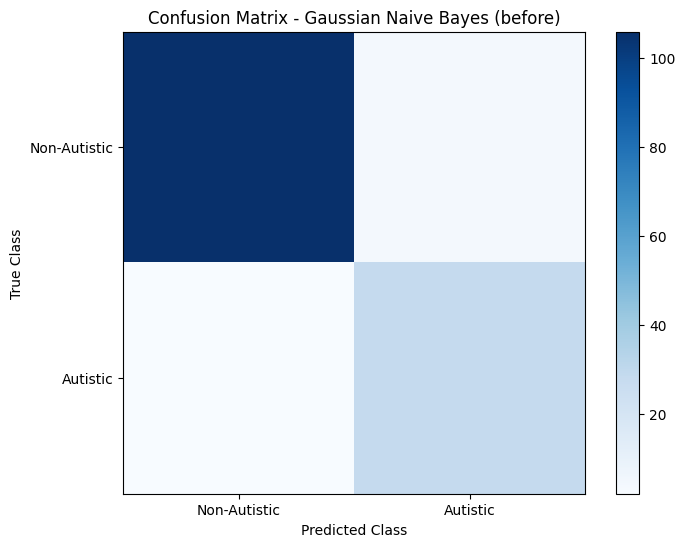

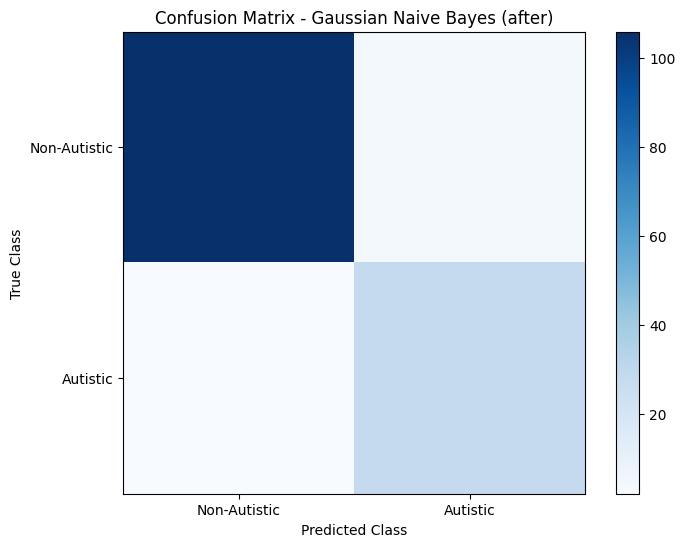

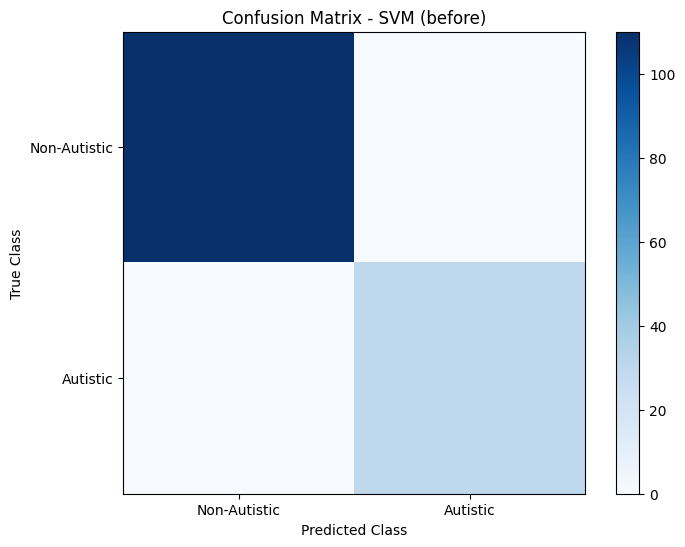

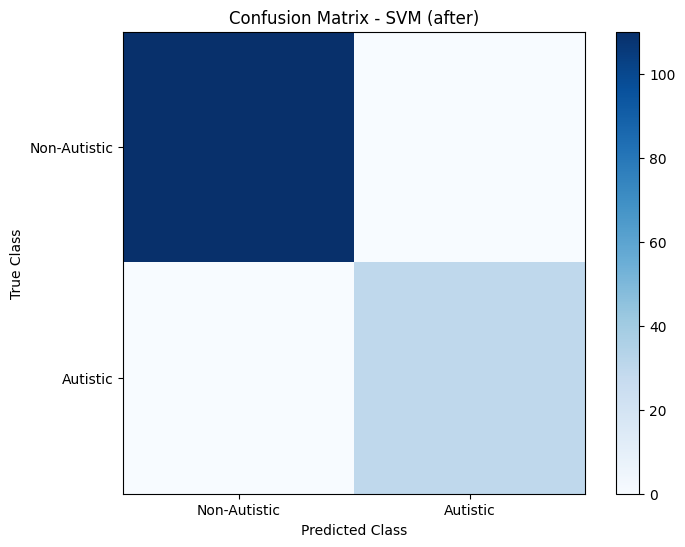

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix Gaussian Naive Bayes (before)
cnf_matrix_gnb_b = confusion_matrix(y_test, y_pred_before_gnb)
plt.figure(figsize=(8, 6))
plt.imshow(cnf_matrix_gnb_b, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gaussian Naive Bayes (before)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Autistic', 'Autistic'])
plt.yticks(tick_marks, ['Non-Autistic', 'Autistic'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Confusion matrix Gaussian Naive Bayes (after)
cnf_matrix_gnb_a = confusion_matrix(y_test, y_pred_after_gnb)
plt.figure(figsize=(8, 6))
plt.imshow(cnf_matrix_gnb_a, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gaussian Naive Bayes (after)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Autistic', 'Autistic'])
plt.yticks(tick_marks, ['Non-Autistic', 'Autistic'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Confusion matrix SVM (before)
cnf_matrix_svm_b = confusion_matrix(y_test, y_pred_before_svm)
plt.figure(figsize=(8, 6))
plt.imshow(cnf_matrix_svm_b, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM (before)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Autistic', 'Autistic'])
plt.yticks(tick_marks, ['Non-Autistic', 'Autistic'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Confusion matrix SVM (after)
cnf_matrix_svm_a = confusion_matrix(y_test, y_pred_after_svm)
plt.figure(figsize=(8, 6))
plt.imshow(cnf_matrix_svm_a, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM (after)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Autistic', 'Autistic'])
plt.yticks(tick_marks, ['Non-Autistic', 'Autistic'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

kfold = KFold(n_splits=5, shuffle=True)

gnb = GaussianNB()
svm = SVC(kernel='linear')

fold = 0
fold_data = []
accuracy_before_gnb = []
accuracy_after_gnb = []
accuracy_before_svm = []
accuracy_after_svm = []

for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Store fold data
    fold_data.append({
        'Fold': fold + 1,
        'Training Samples': len(train_index),
        'Testing Samples': len(test_index)
    })

    # Evaluasi Gaussian Naive Bayes sebelum normalisasi
    gnb.fit(X_train, y_train)
    y_pred_gnb_before = gnb.predict(X_test)
    accuracy_before_gnb.append(accuracy_score(y_test, y_pred_gnb_before))

    # Normalisasi dengan StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluasi Gaussian Naive Bayes setelah normalisasi
    gnb.fit(X_train_scaled, y_train)
    y_pred_gnb_after = gnb.predict(X_test_scaled)
    accuracy_after_gnb.append(accuracy_score(y_test, y_pred_gnb_after))

    # Evaluasi SVM sebelum normalisasi
    svm.fit(X_train, y_train)
    y_pred_svm_before = svm.predict(X_test)
    accuracy_before_svm.append(accuracy_score(y_test, y_pred_svm_before))

    # Evaluasi SVM setelah normalisasi
    svm.fit(X_train_scaled, y_train)
    y_pred_svm_after = svm.predict(X_test_scaled)
    accuracy_after_svm.append(accuracy_score(y_test, y_pred_svm_after))

    fold += 1


# Print fold data
print("Fold Data:")
for fold_info in fold_data:
    print(fold_info)

# Print accuracy
print("Accuracy Gaussian Naive Bayes (Before StandardScaler):")
print(accuracy_before_gnb)
print("Average Accuracy Gaussian Naive Bayes (Before StandardScaler):")
print(np.mean(accuracy_before_gnb))
print("---")
print("Accuracy Gaussian Naive Bayes (After StandardScaler):")
print(accuracy_after_gnb)
print("Average Accuracy Gaussian Naive Bayes (After StandardScaler):")
print(np.mean(accuracy_after_gnb))
print("---")
print("Accuracy SVM (Before StandardScaler):")
print(accuracy_before_svm)
print("Average Accuracy SVM (Before StandardScaler):")
print(np.mean(accuracy_before_svm))
print("---")
print("Accuracy SVM (After StandardScaler):")
print(accuracy_after_svm)
print("Average Accuracy SVM (After StandardScaler):")
print(np.mean(accuracy_after_svm))

Fold Data:
{'Fold': 1, 'Training Samples': 563, 'Testing Samples': 141}
{'Fold': 2, 'Training Samples': 563, 'Testing Samples': 141}
{'Fold': 3, 'Training Samples': 563, 'Testing Samples': 141}
{'Fold': 4, 'Training Samples': 563, 'Testing Samples': 141}
{'Fold': 5, 'Training Samples': 564, 'Testing Samples': 140}
Accuracy Gaussian Naive Bayes (Before StandardScaler):
[0.9858156028368794, 0.9574468085106383, 0.9645390070921985, 0.9645390070921985, 0.9642857142857143]
Average Accuracy Gaussian Naive Bayes (Before StandardScaler):
0.9673252279635258
---
Accuracy Gaussian Naive Bayes (After StandardScaler):
[0.9858156028368794, 0.9574468085106383, 0.9645390070921985, 0.9645390070921985, 0.9642857142857143]
Average Accuracy Gaussian Naive Bayes (After StandardScaler):
0.9673252279635258
---
Accuracy SVM (Before StandardScaler):
[1.0, 1.0, 1.0, 1.0, 1.0]
Average Accuracy SVM (Before StandardScaler):
1.0
---
Accuracy SVM (After StandardScaler):
[1.0, 1.0, 1.0, 1.0, 1.0]
Average Accuracy SVM 

**GAUSSIAN NAIVE BAYES DAN SVM KERNEL C=**

In [30]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Inisialisasi objek KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Menginisialisasi Gaussian Naive Bayes
gnb = GaussianNB()

# Menginisialisasi SVM dengan tiga skenario
svm_scenarios = [
    {'kernel': 'linear', 'C': 0.01},
    {'kernel': 'linear', 'C': 0.001},
    {'kernel': 'linear', 'C': 0.1}
]

# Melakukan loop untuk setiap skenario SVM
for scenario in svm_scenarios:
    print(f"Skenario: Kernel {scenario['kernel']}, C={scenario['C']}")

    # Menyimpan akurasi sebelum dan setelah dilakukan standard scaling
    accuracy_before = []
    accuracy_after = []

    # Melakukan loop untuk setiap fold dalam KFold
    for train_index, test_index in kfold.split(X, y):
        # Mendapatkan data training dan testing
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Melakukan training dan prediksi dengan Gaussian Naive Bayes
        gnb.fit(X_train, y_train)
        y_pred_before = gnb.predict(X_test)

        # Menghitung akurasi sebelum dilakukan standard scaling
        accuracy_before.append(accuracy_score(y_test, y_pred_before))

        # Melakukan standard scaling pada data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Melakukan training dan prediksi dengan SVM
        svm = SVC(kernel=scenario['kernel'], C=scenario['C'])
        svm.fit(X_train_scaled, y_train)
        y_pred_after = svm.predict(X_test_scaled)

        # Menghitung akurasi setelah dilakukan standard scaling
        accuracy_after.append(accuracy_score(y_test, y_pred_after))

    # Menampilkan hasil evaluasi
    print("Hasil evaluasi sebelum standard scaling:")
    print(accuracy_before)
    print("Rata-rata akurasi sebelum standard scaling:", sum(accuracy_before) / len(accuracy_before))

    print("Hasil evaluasi setelah standard scaling:")
    print(accuracy_after)
    print("Rata-rata akurasi setelah standard scaling:", sum(accuracy_after) / len(accuracy_after))
    print()


Skenario: Kernel linear, C=0.01
Hasil evaluasi sebelum standard scaling:
[0.7872340425531915, 0.7163120567375887, 0.7943262411347518, 0.7021276595744681, 0.8928571428571429]
Rata-rata akurasi sebelum standard scaling: 0.7785714285714286
Hasil evaluasi setelah standard scaling:
[1.0, 0.9787234042553191, 0.9858156028368794, 0.9929078014184397, 0.9785714285714285]
Rata-rata akurasi setelah standard scaling: 0.9872036474164133

Skenario: Kernel linear, C=0.001
Hasil evaluasi sebelum standard scaling:
[0.7872340425531915, 0.7163120567375887, 0.7943262411347518, 0.7021276595744681, 0.8928571428571429]
Rata-rata akurasi sebelum standard scaling: 0.7785714285714286
Hasil evaluasi setelah standard scaling:
[0.950354609929078, 0.8723404255319149, 0.950354609929078, 0.8794326241134752, 0.9571428571428572]
Rata-rata akurasi setelah standard scaling: 0.9219250253292806

Skenario: Kernel linear, C=0.1
Hasil evaluasi sebelum standard scaling:
[0.7872340425531915, 0.7163120567375887, 0.794326241134751

In [ ]:
# Seleksi fitur menggunakan Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
# Mendefinisikan objek Gaussian Naive Bayes
gnb = GaussianNB()

# Melakukan seleksi fitur menggunakan metode chi-square
selector_nb = SelectKBest(chi2, k=17)
X_selected_nb = selector_nb.fit_transform(X, y)

# Menampilkan fitur yang dipilih
selected_features_nb = [feature for feature, selected in zip(X.columns, selector_nb.get_support()) if selected]
print("Fitur terpilih menggunakan Naive Bayes: ", selected_features_nb)


# Seleksi fitur menggunakan SVM
from sklearn.svm import SVC

# Mendefinisikan objek SVM
svm = SVC(kernel='linear')

# Melakukan seleksi fitur menggunakan metode RFE
selector_svm = RFE(estimator=svm, n_features_to_select=17, step=1)
X_selected_svm = selector_svm.fit_transform(X, y)

# Menampilkan fitur yang dipilih
selected_features_svm = [feature for feature, selected in zip(X.columns, selector_svm.support_) if selected]
print("Fitur terpilih menggunakan SVM: ", selected_features_svm)


Fitur terpilih menggunakan Naive Bayes:  ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result']
Fitur terpilih menggunakan SVM:  ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'jundice', 'austim', 'used_app_before', 'result', 'relation']


In [ ]:
import pickle

# Menyimpan kedua model ke dalam satu file .sav
filename = 'autism_model.sav'
models = {'gnb': gnb, 'svm': svm}
pickle.dump(models, open(filename, 'wb'))